(15.02)
Проверяю на сколько сильно влияет на бимодальную симуляцию маленький шаг карты давлений (в старой симуляции по умолчанию это период синуса -- 6 клеточек)

### Always to run stuff

In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2

/home/amir/rqc_internship/frame_stack


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
import torch
from torchinfo import summary
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, Dataset


In [3]:
from video_pipeline.video_module import *

In [4]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

In [5]:
import torch_sensor_lib as tsl
sim = tsl.FiberSimulator(config)
import torch_real_sim_lib as trsl
new_sim = trsl.FiberSimulator(config)
import torch_bimodal_sim_lib as tbsl
simb = tbsl.FiberSimulator(config)


In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 

### Клетка для запуска.

### End of always run stuff.
### Beginning of code.

Мне нужно два набора пар точек (координата давления, сигнал) для двух шагов решетки разных.

## Генерирую пары точек для маленького шага 0.35/4

In [7]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
import torch_bimodal_sim_lib as tbsl

config['env']['phys']['sigma'] = 1
config['env']['bimodal']['borning_modes'] = [1, 0]
config['env']['bimodal']['impact_modes'] = [1, 1]
config['env']['bimodal']['intermode_matrix'] = [[1, 0], 
                                                [1, 1]]

config['env']['sen_geometry']['n_angles'] = 1
config['env']['phys']['sigma']
config['env']['bimodal']['period'] = 2.5
config['env']['bimodal']['main_loss_coeff'] = 1.5


config['env']['sen_geometry']['distance'] = 0.35/4

simb = tbsl.FiberSimulator(config)

длина нужная -- 4*2.5 = 10 мм - 4 шага эффекта. Сейчас это 100 точек

In [8]:
indent = 40

def gen_point_pres(x):
    d = 1
    point_pres = np.zeros((180, d), dtype=np.float32)
    point_pres[x, d//2] = 1*0.04 * 40       # firstly for gaus blur. Secondly for force equality
    return point_pres
point_pres = gen_point_pres(35)

dataset_point_presses = np.zeros((point_pres.shape[0]-2*indent,) + point_pres.shape, dtype=np.float32)
for i in range(indent, point_pres.shape[0]-indent):
    dataset_point_presses[i-indent] = gen_point_pres(i)

x_coord_1 = np.arange(0, 100)*(0.35/4)

In [9]:
N = 10

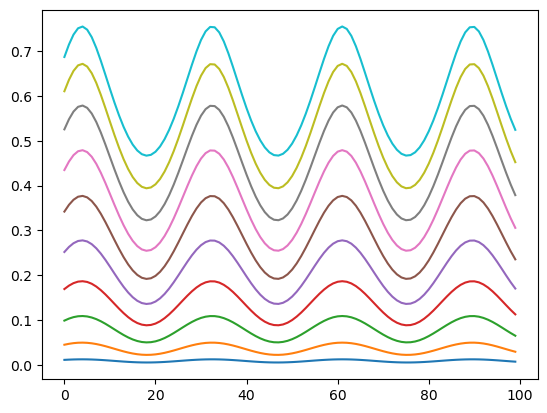

In [10]:
res_sinuses_1 = []
for amplitude in np.linspace(1, 10, N):
    result_numbers = simb.fiber_real_sim(dataset_point_presses*amplitude)
    sinus = result_numbers[:, 0, result_numbers.shape[-1]//2]
    plt.plot(sinus)
    res_sinuses_1.append(sinus)

## Синусоиды с маленьким шагом

In [15]:
scale_factor=4

In [16]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
import torch_bimodal_sim_lib as tbsl

config['env']['phys']['sigma'] = 1
config['env']['bimodal']['borning_modes'] = [1, 0]
config['env']['bimodal']['impact_modes'] = [1, 1]
config['env']['bimodal']['intermode_matrix'] = [[1, 0], 
                                                [1, 1]]

config['env']['sen_geometry']['n_angles'] = 1
config['env']['phys']['sigma']
config['env']['bimodal']['period'] = 2.5
config['env']['bimodal']['main_loss_coeff'] = 1.5


config['env']['sen_geometry']['distance'] = 0.35/4*scale_factor

simb = tbsl.FiberSimulator(config)

длина нужная -- 4*2.5 = 10 мм - 4 шага эффекта. Сейчас это 25 точек

In [17]:
indent = 40

def gen_point_pres(x):
    d = 1
    point_pres = np.zeros((105, d), dtype=np.float32)
    point_pres[x, d//2] = 1*0.04 * 40       # firstly for gaus blur. Secondly for force equality
    return point_pres
point_pres = gen_point_pres(35)

dataset_point_presses = np.zeros((point_pres.shape[0]-2*indent,) + point_pres.shape, dtype=np.float32)
for i in range(indent, point_pres.shape[0]-indent):
    dataset_point_presses[i-indent] = gen_point_pres(i)

x_coord_2 = np.arange(0, 25)*(0.35)

In [18]:
N = 10

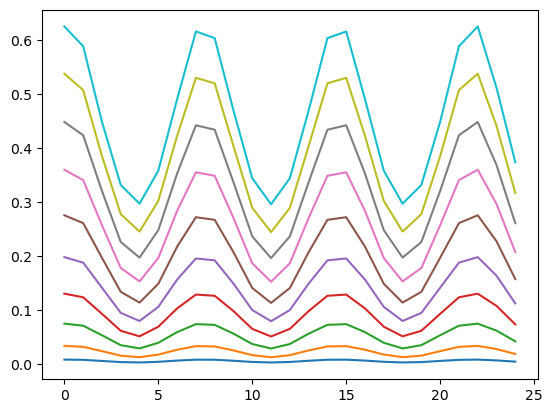

In [20]:
res_sinuses_2 = []
for amplitude in np.linspace(1, 10, N)/scale_factor:
    # because each sell is in scale factor bigger, new value is average for scale_factor**2 old cells
    result_numbers = simb.fiber_real_sim(dataset_point_presses*amplitude)
    sinus = result_numbers[:, 0, result_numbers.shape[-1]//2]
    plt.plot(sinus)
    res_sinuses_2.append(sinus)

## Финальное сравнение:

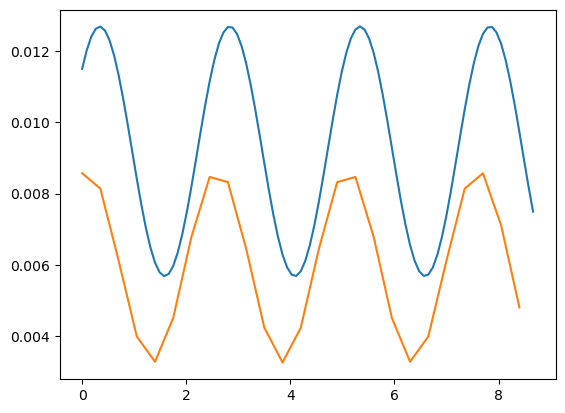

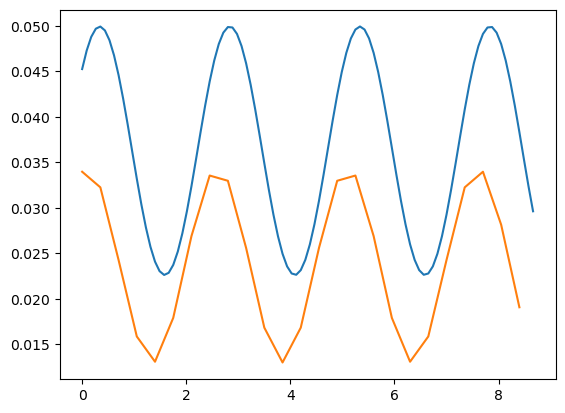

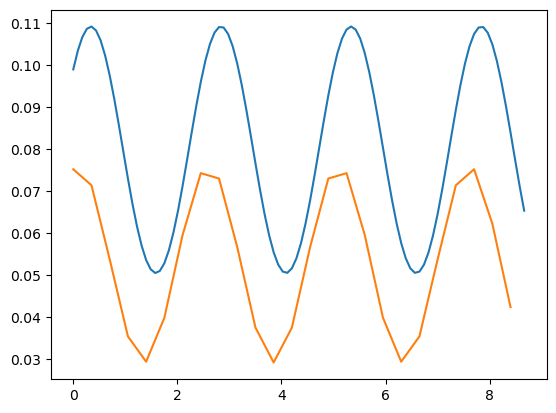

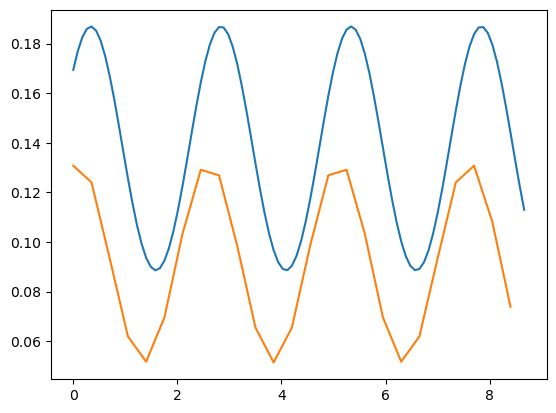

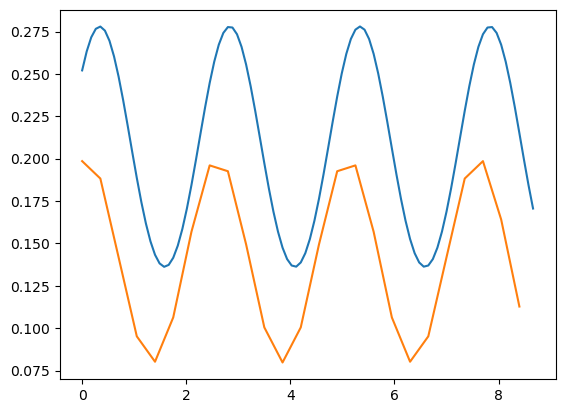

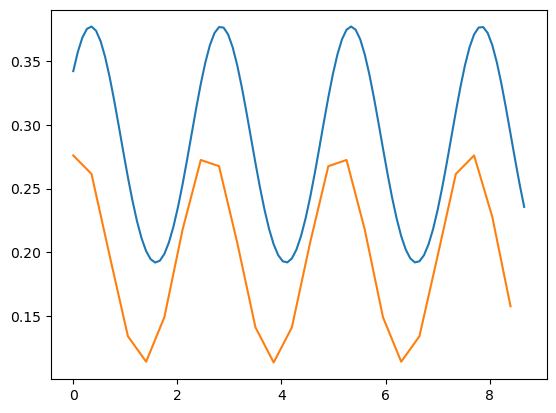

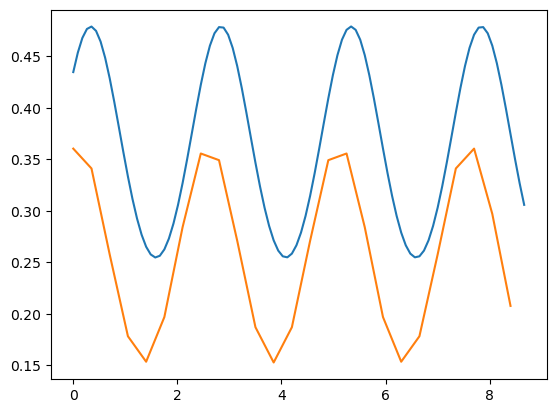

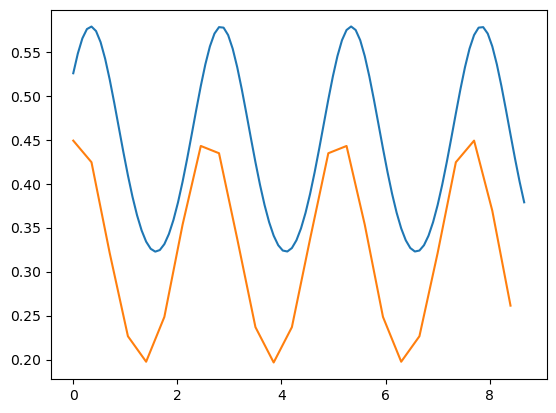

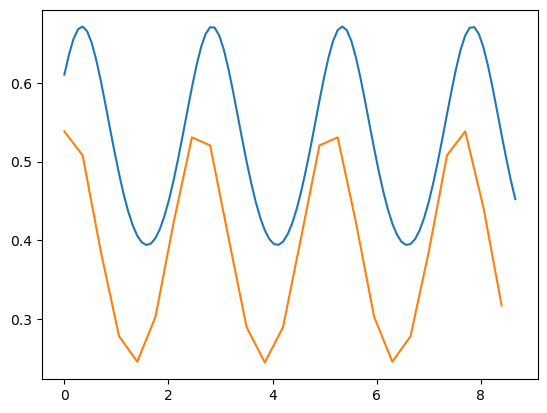

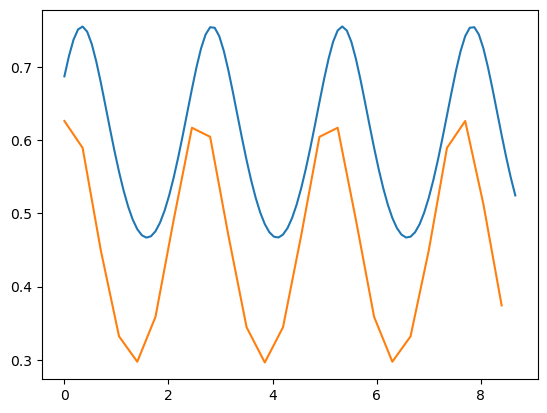

In [21]:
for sinus1, sinus2 in zip(res_sinuses_1, res_sinuses_2):
    plt.plot(x_coord_1, sinus1)
    plt.plot(x_coord_2, sinus2)
    plt.show()
    